<a href="https://colab.research.google.com/github/Danilo-Carvalho-Antunes/fastaiOnCampus/blob/main/Lesson1_Danilo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# It's a Airplane or a Helicopter ?
### Lesson 1 - Student 211039312
### Danilo Carvalho Antunes
### Github: Danilo-Carvalho-Antunes


# Introduction

The project to follow was made for the discipline "Aprendizado de Maquina" from UnB, taught by Fabricio Braz. The main point of the task was to recognize if the image searched is a airplane or not.

## Criteria of the Project:


*   The main objetive of it is to create a model of machine learning capable of recognize one tipe of vehicle, the airplane. To do this is necessary to use some techniques of deep learning. Although the model could be use with most of the images in the internet, I chose to use the images of a Helicopter because it's more similar with a airplane.

*   Theme of the project is taught in the lesson?
Lesson 1 shows some techniques of the deep learning and some basics concepts of jupyter and python, and how to build a model that can classify any tipe of image and compare with a different one.

*   The images are coherent ?
The images were got from duckduckgo, "airplane images" and "helicopter images" more further ahead in the project are some tests to see if the image is coherent with the search.

*   The Project is organize ?
The project is dive in cells os code and some text between to explain what is happening in the code.


*   It's made in jupyter and google Colab




# Cells 1, 2 and 3.
Are to get the fastai lib and the results of duckduckgo search

In [1]:
!pip install -Uqq fastai

In [2]:
!pip install -Uqq duckduckgo_search

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 44.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.6 MB/s eta 0:00:00


In [14]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=300):
    print(f"Searching for '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

# Cell 4 and 5
This one is to get one example of the item we want to search, using some functions of fastai and other function from fastdownload to help with the uploading images.

Both of the cells shows the result of the search in duckduckgo and download the images as airplane.jpg or helicopter.jpg from the respective search.

Searching for 'airplane images'


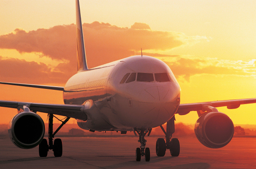

In [16]:
from fastai.vision.all import *
from fastdownload import download_url

urls = search_images('airplane images', max_images=1)
urls[0]

dest = 'airplane.jpg'
download_url(urls[0], dest, show_progress=True)

im = Image.open(dest)
im.to_thumb(256,256)

Searching for 'helicopter images'


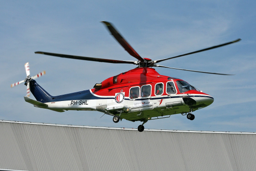

In [17]:
download_url(search_images('helicopter images', max_images=1)[0], 'helicopter.jpg', show_progress=True)
Image.open('helicopter.jpg').to_thumb(256,256)

# Cell 6
In this one is were the search and download happens, in the top is made the path who can be found as a folder for the images to make our sistem more capable to recognize the airplane it's important to get a few examples of airplanes, because of that the search is going to be done in big and small airplanes and obviously one with no other word, the same with the helicopter.

In [18]:
searches = 'airplane','helicopter'
path = Path('airplane_or_helicopter')
from time import sleep

for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o}'))
    sleep(10)  # Pause between searches to avoid over-loading server
    download_images(dest, urls=search_images(f'big {o}'))
    sleep(10)
    download_images(dest, urls=search_images(f'small {o}'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

Searching for 'airplane'
Searching for 'big airplane'
Searching for 'small airplane'
Searching for 'helicopter'
Searching for 'big helicopter'
Searching for 'small helicopter'


# Cell 7
This cell is to verify how many images got problems when were being downloaded


In [19]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

14

# Cell 8
Here is where we build the DataBlock which is basicly our block of images or itens that we are going to use for teaching the machine how to recognize the image. To do that we have to define wich tipe of the data is and padronize them.

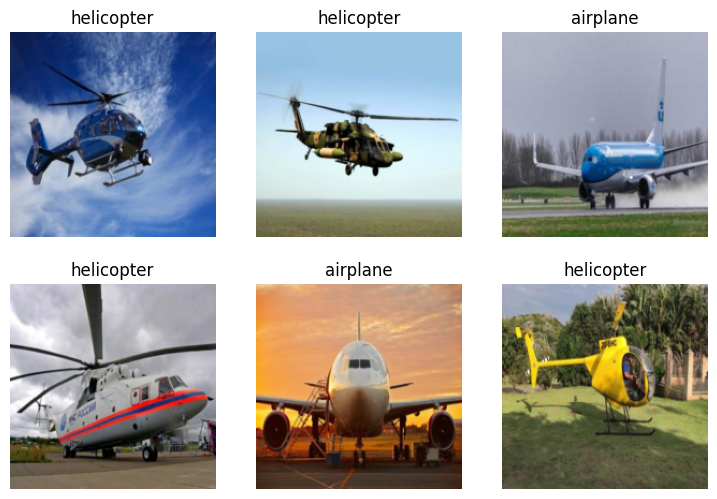

In [21]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

# Cell 9
Now resnet18 learn how to identify what is a airplane through the DataBlock, and we can chose how many times the traning is going to take.

In [25]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

epoch,train_loss,valid_loss,error_rate,time
0,0.727923,0.143264,0.050505,00:59


epoch,train_loss,valid_loss,error_rate,time
0,0.206858,0.173917,0.040404,01:39
1,0.137712,0.165195,0.040404,01:39
2,0.091966,0.070337,0.030303,01:28
3,0.071242,0.074293,0.020202,01:38
4,0.056014,0.063764,0.030303,01:37
5,0.043430,0.068014,0.030303,01:37


# Cell 10
In this one we are just going to see some results of the tests, if resnet18 have learned enough. If the names are all green it means the it was a success and if some of them are different from the other in the same image and also red it means that the test failed.

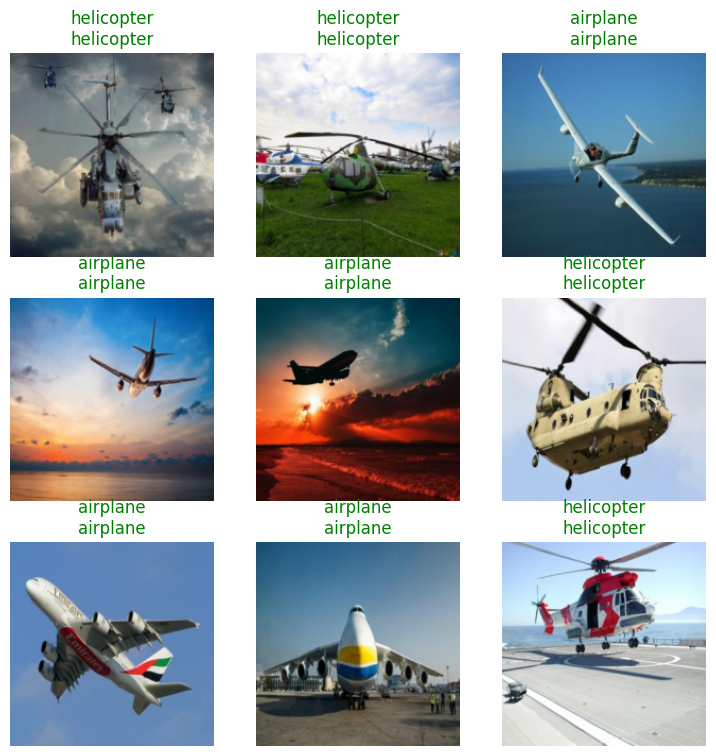

In [26]:
learn.show_results(max_n=9)

# Cell 11
Here is our final and last cell, in this one we are testing if the resnet18 is able to recognize the first airplane image shown in the project.
Right below is the probability of the image to be a airplane.

In [31]:
is_airplane,_,probs = learn.predict(PILImage.create('airplane.jpg'))
print(f" {is_airplane}.")
print(f"It's a airplane: {probs[0]:.4f}")

 airplane.
It's a airplane: 1.0000
